In [71]:
import pandas as pd
import matplotlib
# matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
%matplotlib inline


In [72]:

dj = pd.read_csv('data/DJIA.csv')
nq = pd.read_csv('data/Nasdaq.csv')
sp = pd.read_csv('data/SP500.csv')
tse = pd.read_csv('data/tse.csv')
moon = pd.read_csv('data/FullMoonDates.csv')
all_dates = pd.read_csv('data/DateDim-moon-holiday(from 1985).txt')
all_dates[:2]


,ID,date key,full date,datetext,day num in month,day abbrev,Month,month abbrev,Year,HolidayUSA,isMoon,HolidayCAN
0,1,19850101,1/1/1985 0:00:00,1985-01-01,1,Tue,1,Jan,1985,New Year's Day,notFullMoon,New Year's Day
1,2,19850102,1/2/1985 0:00:00,1985-01-02,2,Wed,1,Jan,1985,NonHoliday,notFullMoon,NonHoliday


In [73]:

all_dates.columns = [u'ID', u'date key', u'full date', u'Date', u'month_num',
       u'Day', u'Month', u'month abbrev', u'Year', u'HolidayUSA',
       u'isMoon', u'HolidayCAN']

all_dates[:3]

,ID,date key,full date,Date,month_num,Day,Month,month abbrev,Year,HolidayUSA,isMoon,HolidayCAN
0,1,19850101,1/1/1985 0:00:00,1985-01-01,1,Tue,1,Jan,1985,New Year's Day,notFullMoon,New Year's Day
1,2,19850102,1/2/1985 0:00:00,1985-01-02,2,Wed,1,Jan,1985,NonHoliday,notFullMoon,NonHoliday
2,3,19850103,1/3/1985 0:00:00,1985-01-03,3,Thu,1,Jan,1985,NonHoliday,notFullMoon,NonHoliday


In [74]:
all_dates = all_dates[['Date','isMoon', 'HolidayUSA', 'HolidayCAN', 'Day', 'Month']]

all_dates['Date']=pd.to_datetime(all_dates['Date'])


all_dates[:3]


,Date,isMoon,HolidayUSA,HolidayCAN,Day,Month
0,1985-01-01,notFullMoon,New Year's Day,New Year's Day,Tue,1
1,1985-01-02,notFullMoon,NonHoliday,NonHoliday,Wed,1
2,1985-01-03,notFullMoon,NonHoliday,NonHoliday,Thu,1


In [75]:
holidays = all_dates[['Date', 'HolidayUSA', 'HolidayCAN']]

# # holidayUS['HolidayUSA'] = all_dates.loc[all_dates['column_name'] == some_value]

# # df.loc[df['column_name'] == some_value]
# # holidayCAN = all_dates[['HolidayCAN']]



# holidays.loc[holidays.HolidayUSA != 'NonHoliday', 'HolidayUSA'] = 1
# holidays.loc[holidays.HolidayUSA == 'NonHoliday', 'HolidayUSA'] = 0

# holidays.loc[holidays.HolidayCAN != 'NonHoliday', 'HolidayCAN'] = 1
# holidays.loc[holidays.HolidayCAN == 'NonHoliday', 'HolidayCAN'] = 0

# holidays[11000:15000]

# holidaysUS = holidays[holidays['HolidayUSA'] == 1]
# holidaysCA = holidays[holidays['HolidayCAN'] == 1]
# holidays_can = holidaysCA[['Date', 'HolidayCAN']] 
# holidays_usa = holidaysUS[['Date', 'HolidayUSA']]

# holidays_can = holidays_can[holidays_can['Date'] < '2016-03-05']
# holidays_usa = holidays_usa[holidays_usa['Date'] < '2016-03-05']


# holidays_can[:3]

In [76]:
# from datetime import datetime
# moon['date'] = moon.apply(lambda row: datetime.strptime(
#             "%d-%s-%d" % (row['Year'], row['Month'], row['Day']),
#             "%Y-%b-%d"
#         ), axis=1)

dj['percent_change'] = ((dj['Close'] - dj['Close'].shift(-1)))/dj['Close'].shift(-1)
nq['percent_change'] = ((nq['Close'] - nq['Close'].shift(-1)))/nq['Close'].shift(-1)
sp['percent_change'] = ((sp['Close'] - sp['Close'].shift(-1)))/sp['Close'].shift(-1)
tse['percent_change'] = ((tse['Close'] - tse['Close'].shift(-1)))/tse['Close'].shift(-1)

tse[:4]

,Date,Open,High,Low,Close,Volume,Adj Close,percent_change
0,2016-03-04,13150.500000,13281.799805,13150.500000,13212.500000,394167400,13212.500000,0.006766
1,2016-03-03,13055.200195,13157.400391,13025.500000,13123.700195,343296700,13123.700195,0.008127
2,2016-03-02,12985.200195,13030.400391,12858.000000,13017.900391,295879500,13017.900391,0.002758
3,2016-03-01,12896.299805,12998.500000,12896.299805,12982.099609,285256700,12982.099609,0.009463


In [77]:

# moon.columns = [u'Year', u'Month', u'Day', u'Time', u'Day.1', u'Unnamed: 5', u'Date']
# moons = moon[['Date']]


tse['Date']=pd.to_datetime(tse['Date'])
dj['Date']= pd.to_datetime(dj['Date'])
sp['Date']=pd.to_datetime(sp['Date'])
nq['Date']=pd.to_datetime(nq['Date'])
# type(tse['Date'][1])

# moons['Date']
# moons['Date'] = moons['Date'].apply(lambda x: x.date())

# moons[:4]
# pd.Series(moons['Date'])
tse[:3]

,Date,Open,High,Low,Close,Volume,Adj Close,percent_change
0,2016-03-04,13150.500000,13281.799805,13150.5,13212.500000,394167400,13212.500000,0.006766
1,2016-03-03,13055.200195,13157.400391,13025.5,13123.700195,343296700,13123.700195,0.008127
2,2016-03-02,12985.200195,13030.400391,12858.0,13017.900391,295879500,13017.900391,0.002758


In [78]:


all_dates_tse = pd.merge(tse, all_dates, right_on='Date', left_on='Date', how='inner')
all_dates_dj = pd.merge(dj, all_dates, right_on='Date', left_on='Date', how='inner')
all_dates_nq = pd.merge(nq, all_dates, right_on='Date', left_on='Date', how='inner')
all_dates_sp = pd.merge(sp, all_dates, right_on='Date', left_on='Date', how='inner')

all_dates_nq[:3]


,Date,Open,High,Low,Close,Volume,Adj Close,percent_change,isMoon,HolidayUSA,HolidayCAN,Day,Month
0,2016-03-04,4715.759766,4746.649902,4687.939941,4717.020020,2171230000,4717.020020,0.002039,notFullMoon,NonHoliday,NonHoliday,Fri,3
1,2016-03-03,4698.379883,4707.720215,4674.459961,4707.419922,1936290000,4707.419922,0.000850,notFullMoon,NonHoliday,NonHoliday,Thu,3
2,2016-03-02,4683.799805,4703.580078,4665.930176,4703.419922,1912510000,4703.419922,0.002947,notFullMoon,NonHoliday,NonHoliday,Wed,3


In [79]:

exchanges = [all_dates_tse, all_dates_dj, all_dates_nq, all_dates_sp]

for exchange in exchanges:
    exchange['weekday'] = exchange['Date'].dt.dayofweek

all_dates_dj[:3]

,Date,Open,High,Low,Close,Volume,Adj Close,percent_change,isMoon,HolidayUSA,HolidayCAN,Day,Month,weekday
0,2016-03-04,16945.000000,17062.380859,16898.839844,17006.769531,106910000,17006.769531,0.003710,notFullMoon,NonHoliday,NonHoliday,Fri,3,4
1,2016-03-03,16896.169922,16944.310547,16820.730469,16943.900391,91110000,16943.900391,0.002638,notFullMoon,NonHoliday,NonHoliday,Thu,3,3
2,2016-03-02,16851.169922,16900.169922,16766.320312,16899.320312,104470000,16899.320312,0.002030,notFullMoon,NonHoliday,NonHoliday,Wed,3,2


In [80]:
all_dates_dj['percent_change'].mean()


0.00039182184291288927

In [81]:
all_dates_tse['isMoon'] = all_dates_tse['isMoon'].map({'fullmoon': 1, 'notFullMoon': 0})
all_dates_dj['isMoon'] = all_dates_dj['isMoon'].map({'fullmoon': 1, 'notFullMoon': 0})
all_dates_nq['isMoon'] = all_dates_nq['isMoon'].map({'fullmoon': 1, 'notFullMoon': 0})
all_dates_sp['isMoon'] = all_dates_sp['isMoon'].map({'fullmoon': 1, 'notFullMoon': 0})





In [82]:
all_dates_tse[:3]


,Date,Open,High,Low,Close,Volume,Adj Close,percent_change,isMoon,HolidayUSA,HolidayCAN,Day,Month,weekday
0,2016-03-04,13150.500000,13281.799805,13150.5,13212.500000,394167400,13212.500000,0.006766,0,NonHoliday,NonHoliday,Fri,3,4
1,2016-03-03,13055.200195,13157.400391,13025.5,13123.700195,343296700,13123.700195,0.008127,0,NonHoliday,NonHoliday,Thu,3,3
2,2016-03-02,12985.200195,13030.400391,12858.0,13017.900391,295879500,13017.900391,0.002758,0,NonHoliday,NonHoliday,Wed,3,2


In [83]:
all_dates = [all_dates_dj, all_dates_nq, all_dates_sp, all_dates_tse]



In [84]:

holidays.loc[holidays.HolidayUSA != 'NonHoliday', 'HolidayUSA'] = int(1)
holidays.loc[holidays.HolidayUSA == 'NonHoliday', 'HolidayUSA'] = int(0)
holidays.loc[holidays.HolidayCAN != 'NonHoliday', 'HolidayCAN'] = int(1)
holidays.loc[holidays.HolidayCAN == 'NonHoliday', 'HolidayCAN'] = int(0)


In [85]:
holidays['weekday'] = holidays['Date'].dt.dayofweek

In [86]:
holidays[:3]

,Date,HolidayUSA,HolidayCAN,weekday
0,1985-01-01,1,1,1
1,1985-01-02,0,0,2
2,1985-01-03,0,0,3


In [87]:
holidays = holidays[holidays.weekday != 5]
holidays = holidays[holidays.weekday != 6]

In [88]:
# holidays[:300]

In [89]:
holidays['HolidayCAN_shifted1']= holidays['HolidayCAN'].shift(-1)
# holidays['HolidayCAN_shifted2']= holidays['HolidayCAN'].shift(-2)
# holidays['HolidayCAN_shifted3']= holidays['HolidayCAN'].shift(-3)

holidays['HolidayUSA_shifted1']= holidays['HolidayUSA'].shift(-1)
# holidays['HolidayUSA_shifted2']= holidays['HolidayUSA'].shift(-2)
# holidays['HolidayUSA_shifted3']= holidays['HolidayUSA'].shift(-3)

In [90]:
# hol['USshifted'] = holidays['HolidayUSA']

In [91]:
# exchanges = [all_dates_tse, all_dates_dj, all_dates_nq, all_dates_sp]

# for exchange in exchanges:
#     exchange['pre_holiday_us'] = holidays['HolidayUSA_shifted1']
#     exchange['pre_holiday_ca'] = holidays['HolidayCAN_shifted1']
# all_dates_nq1 = pd.merge(nq, holidays, right_on='Date', left_on='Date', how='inner')


tse_dates = pd.merge(all_dates_tse, holidays, right_on='Date', left_on='Date', how='inner')
dj_dates = pd.merge(all_dates_dj, holidays, right_on='Date', left_on='Date', how='inner')
nq_dates = pd.merge(all_dates_nq, holidays, right_on='Date', left_on='Date', how='inner')
sp_dates = pd.merge(all_dates_sp, holidays, right_on='Date', left_on='Date', how='inner')


tse_dates[:30]

In [92]:
tse_data = tse_dates[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'percent_change', 'isMoon', 'HolidayCAN_y', 'HolidayCAN_shifted1', 'weekday_x', 'Month']]
dj_data = dj_dates[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'percent_change', 'isMoon', 'HolidayUSA_y', 'HolidayUSA_shifted1', 'weekday_x', 'Month']]
nq_data = nq_dates[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'percent_change', 'isMoon', 'HolidayUSA_y', 'HolidayUSA_shifted1', 'weekday_x', 'Month']]
sp_data = sp_dates[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'percent_change', 'isMoon', 'HolidayUSA_y', 'HolidayUSA_shifted1', 'weekday_x', 'Month']]

In [93]:
sp_data[:3]

,Date,Open,High,Low,Close,Volume,Adj Close,percent_change,isMoon,HolidayUSA_y,HolidayUSA_shifted1,weekday_x,Month
0,2016-03-04,1994.010010,2009.130005,1986.770020,1999.989990,6049930000,1999.989990,0.003306,0,0,0,4,3
1,2016-03-03,1985.599976,1993.689941,1977.369995,1993.400024,5081700000,1993.400024,0.003499,0,0,0,3,3
2,2016-03-02,1976.599976,1986.510010,1968.800049,1986.449951,4666610000,1986.449951,0.004094,0,0,0,2,3


In [94]:


holiday_usa_sp = sp_data.loc[sp_data['HolidayUSA_y'] == 1]
holiday_usa_nq = nq_data.loc[nq_data['HolidayUSA_y'] == 1]
holiday_usa_dj = dj_data.loc[sp_data['HolidayUSA_y'] == 1]
holiday_can_tse = tse_data.loc[tse_data['HolidayCAN_y'] == 1]
no_holiday_usa_sp = sp_data.loc[sp_data['HolidayUSA_y'] == 0]
no_holiday_usa_nq = nq_data.loc[nq_data['HolidayUSA_y'] == 0]
no_holiday_usa_dj = dj_data.loc[sp_data['HolidayUSA_y'] == 0]
no_holiday_can_tse = tse_data.loc[tse_data['HolidayCAN_y'] == 0]
# b = tse_data.loc[tse_data['HolidayCAN_shifted1'] == 1]
# a['percent_change'].mean()
# len(b['percent_change'])

In [95]:
# test_dj = dj_data[dj_data.Date > '2005-01-01']
# train_dj = dj_data[dj_data.Date <= '2005-01-01']
# train_dj[:3]

# from collections import OrderedDict

# holiday_or_no = OrderedDict()
# holiday_or_no = {'holiday_sp': holiday_usa_sp['percent_change'].mean(), 
#                  'no_holiday_sp': no_holiday_usa_sp['percent_change'].mean(), 
#                  'holiday_nq': holiday_usa_nq['percent_change'].mean(), 
#                  'no_holiday_nq': no_holiday_usa_nq['percent_change'].mean(), 
#                  'holiday_dj': holiday_usa_dj['percent_change'].mean(), 
#                  'no_holiday_dj': no_holiday_usa_dj['percent_change'].mean(), 
#                  'holiday_tse': holiday_can_tse['percent_change'].mean(), 
#                  'no_holiday_tse': no_holiday_can_tse['percent_change'].mean(), 
# }

holiday_sp =  holiday_usa_sp['percent_change'].mean()
no_holiday_sp = no_holiday_usa_sp['percent_change'].mean()
holiday_nq = holiday_usa_nq['percent_change'].mean()
no_holiday_nq = no_holiday_usa_nq['percent_change'].mean() 
holiday_dj = holiday_usa_dj['percent_change'].mean() 
no_holiday_dj = no_holiday_usa_dj['percent_change'].mean() 
holiday_tse = holiday_can_tse['percent_change'].mean()
no_holiday_tse = no_holiday_can_tse['percent_change'].mean()






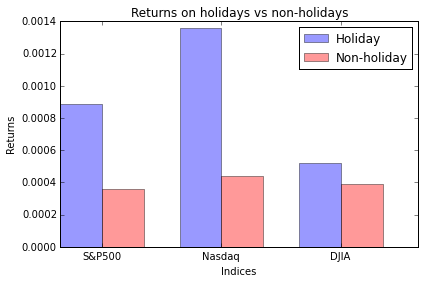

In [96]:
# y = list(holiday_or_no.keys())
# x = list(holiday_or_no.values())
import numpy as np

y = [holiday_sp, holiday_nq, holiday_dj]
x = [no_holiday_sp, no_holiday_nq, no_holiday_dj]

n_groups = 3

index = np.arange(n_groups)

bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}


rects1 = plt.bar(index, y, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Holiday')

rects2 = plt.bar(index + bar_width, x, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-holiday')

plt.xlabel('Indices')
plt.ylabel('Returns')
plt.title('Returns on holidays vs non-holidays')
plt.xticks(index + bar_width, ('S&P500', 'Nasdaq', 'DJIA'))
plt.legend()

plt.tight_layout()
plt.show()






In [97]:
mon_sp =  sp_data[sp_data['weekday_x'] == 0]['percent_change']
tue_sp =  sp_data[sp_data['weekday_x'] == 1]['percent_change']
wed_sp =  sp_data[sp_data['weekday_x'] == 2]['percent_change']
thu_sp =  sp_data[sp_data['weekday_x'] == 3]['percent_change']
fri_sp =  sp_data[sp_data['weekday_x'] == 4]['percent_change']

mon_nq =  nq_data[nq_data['weekday_x'] == 0]['percent_change']
tue_nq =  nq_data[nq_data['weekday_x'] == 1]['percent_change']
wed_nq =  nq_data[nq_data['weekday_x'] == 2]['percent_change']
thu_nq =  nq_data[nq_data['weekday_x'] == 3]['percent_change']
fri_nq =  nq_data[nq_data['weekday_x'] == 4]['percent_change']

mon_dj =  dj_data[dj_data['weekday_x'] == 0]['percent_change']
tue_dj =  dj_data[dj_data['weekday_x'] == 1]['percent_change']
wed_dj =  dj_data[dj_data['weekday_x'] == 2]['percent_change']
thu_dj =  dj_data[dj_data['weekday_x'] == 3]['percent_change']
fri_dj =  dj_data[dj_data['weekday_x'] == 4]['percent_change']

mon_tse =  tse_data[tse_data['weekday_x'] == 0]['percent_change']
tue_tse =  tse_data[tse_data['weekday_x'] == 1]['percent_change']
wed_tse =  tse_data[tse_data['weekday_x'] == 2]['percent_change']
thu_tse =  tse_data[tse_data['weekday_x'] == 3]['percent_change']
fri_tse =  tse_data[tse_data['weekday_x'] == 4]['percent_change']

# mon_sp.cumsum()



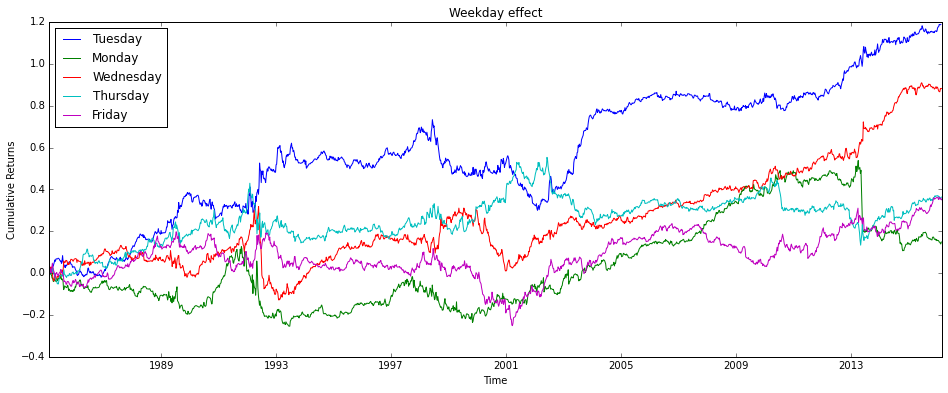

In [98]:
a = mon_sp.cumsum().iloc[::-1]
b = sp_data[sp_data['weekday_x'] == 0]['Date']

x = tue_sp.cumsum().iloc[::-1]
y = sp_data[sp_data['weekday_x'] == 1]['Date']

c = wed_sp.cumsum().iloc[::-1]
d = sp_data[sp_data['weekday_x'] == 2]['Date']

k = thu_sp.cumsum().iloc[::-1]
l = sp_data[sp_data['weekday_x'] == 3]['Date']

t = fri_sp.cumsum().iloc[::-1]
u = sp_data[sp_data['weekday_x'] == 4]['Date']

fig = plt.figure(figsize=(16, 6))
plt.plot(y, x, label="Tuesday")
plt.plot(b, a, label="Monday")
plt.plot(d, c, label="Wednesday")
plt.plot(l, k, label="Thursday")
plt.plot(u, t, label="Friday")


plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Weekday effect')
plt.legend(loc = 2)


plt.show()


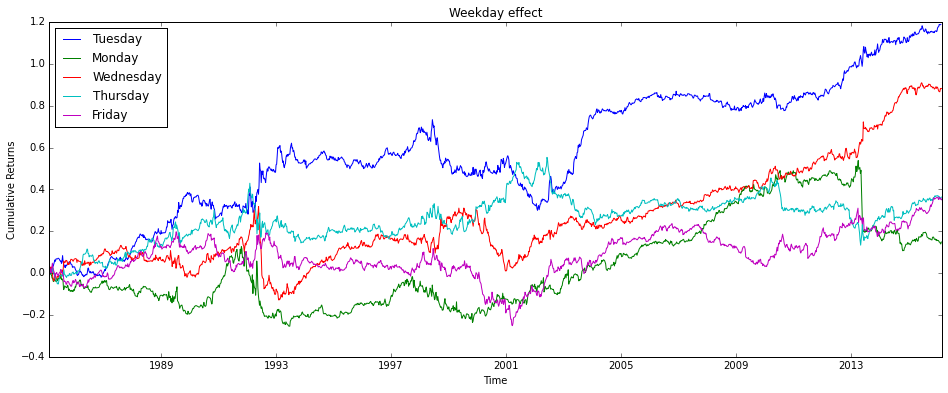

In [99]:

fig = plt.figure(figsize=(16, 6))
plt.plot(y, x, label="Tuesday")
plt.plot(b, a, label="Monday")
plt.plot(d, c, label="Wednesday")
plt.plot(l, k, label="Thursday")
plt.plot(u, t, label="Friday")


plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Weekday effect')
plt.legend(loc = 2)


plt.show()

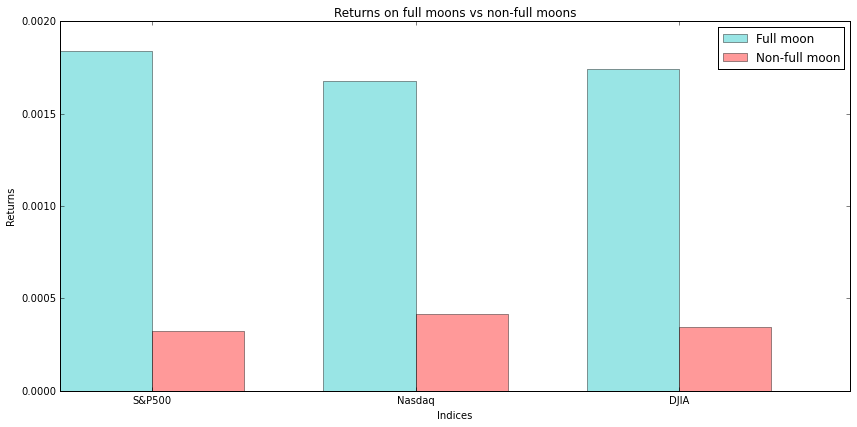

(0.0018394233679377074, 0.00032206040787932378)

In [100]:
moon_sp = sp_data[sp_data['isMoon'] == 1]['percent_change'].mean()
no_moon_sp = sp_data[sp_data['isMoon'] == 0]['percent_change'].mean()
moon_nq = nq_data[nq_data['isMoon'] == 1]['percent_change'].mean()
no_moon_nq = nq_data[nq_data['isMoon'] == 0]['percent_change'].mean()
moon_dj = dj_data[dj_data['isMoon'] == 1]['percent_change'].mean()
no_moon_dj = dj_data[dj_data['isMoon'] == 0]['percent_change'].mean()

fig = plt.figure(figsize=(12, 6))

yy = [moon_sp, moon_nq, moon_dj]
xx = [no_moon_sp, no_moon_nq, no_moon_dj]

n_groups = 3

index = np.arange(n_groups)

bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}


rects1 = plt.bar(index, yy, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Full moon')

rects2 = plt.bar(index + bar_width, xx, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-full moon')

plt.xlabel('Indices')
plt.ylabel('Returns')
plt.title('Returns on full moons vs non-full moons')
plt.xticks(index + bar_width, ('S&P500', 'Nasdaq', 'DJIA'))
plt.legend()

plt.tight_layout()

plt.show()




moon_sp, no_moon_sp

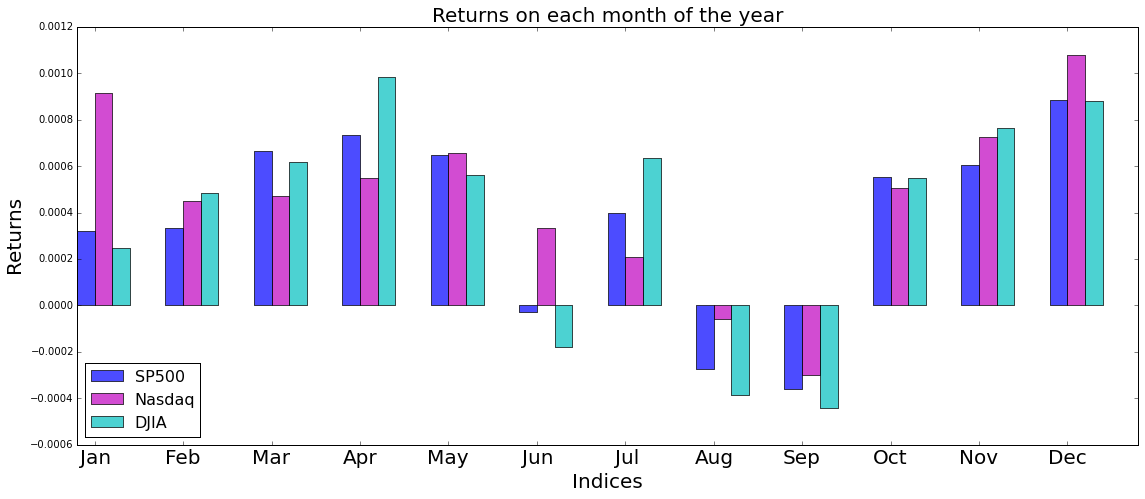

In [101]:
sp_month_return = []
nq_month_return = []
dj_month_return = []

for i in range(1, 13):
    sp_month_return.append(sp_data[sp_data['Month'] == i]['percent_change'].mean())
sp_month_return
for i in range(1, 13):
    nq_month_return.append(nq_data[nq_data['Month'] == i]['percent_change'].mean())
sp_month_return
for i in range(1, 13):
    dj_month_return.append(dj_data[dj_data['Month'] == i]['percent_change'].mean())
sp_month_return

    
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


fig = plt.figure(figsize=(16, 7))
bar_width = 0.2

opacity = 0.7
n_groups = 12

index = np.arange(n_groups)

rects1 = plt.bar(index, sp_month_return, bar_width,
                 alpha=opacity,
                 color='b',
                 label='SP500')
rects2 = plt.bar(index + bar_width, nq_month_return, bar_width,
                 alpha=opacity,
                 color='m',
                 label='Nasdaq')

rects3 = plt.bar(index + bar_width + bar_width, dj_month_return, bar_width,
                 alpha=opacity,
                 color='c',
                 label='DJIA')


plt.xlabel('Indices', fontsize=20)
plt.ylabel('Returns', fontsize=20)
plt.title('Returns on each month of the year', fontsize=20)
plt.xticks(index + bar_width, (months), fontsize=20)
plt.legend()
plt.legend(loc = 3, prop={'size':16})
plt.tight_layout()

plt.show()



# len(sp_month_return)
# sp_month_return



In [102]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy

In [103]:
predictors_dj = [dj_data['isMoon'], dj_data['HolidayUSA_shifted1'], dj_data['weekday_x'], dj_data['Month']]
target_dj = [dj_data['percent_change']]

In [104]:
# from scipy.cluster import KMeans
# import sc
# from sklearn.cluster import KMeans
# from sklearn import svm




In [105]:
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [115]:
train_X = sp_data[['isMoon', 'weekday_x', 'HolidayUSA_y', 'Month']]
train_y = sp_data['percent_change'].fillna(0)
test_X = dj_data[['isMoon', 'weekday_x', 'HolidayUSA_y', 'Month']]

train_X = train_X.as_matrix
test_X = test_X.as_matrix

# train_X['HolidayUSA_y'] = pd.to_numeric(train_X['HolidayUSA_y'])
# test_X['HolidayUSA_y'] = test_X['HolidayUSA_y'].astype('int')
# train_X['HolidayUSA_y']

In [117]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=10, learning_rate=0.05).fit(train_X, train_y)
predictions = gbm.predict(test_X)
# train_X

Exception AttributeError: "'DMatrix' object has no attribute 'handle'" in <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f18f7bb7b90>> ignored


TypeError: can not initialize DMatrix from instancemethod

In [ ]:
# submission = pd.DataFrame({ 'Date': dj_data['percent_close'],
#                             'percent_close': predictions })

In [ ]:
# submission